# Adaptive integration

In [1]:
f = x -> (x+1)^2*cos((2*x+1)/(x-4.3));

using QuadGK
@show I,errest = quadgk(f,0,4,atol=1e-14,rtol=1e-14);  # 'exact' value

(I, errest) = quadgk(f, 0, 4, atol = 1.0e-14, rtol = 1.0e-14) = (-2.825533373437446, 2.1510571102112408e-14)


We perform the integration and show the nodes selected underneath the curve.

num_nodes = length(t) = 69


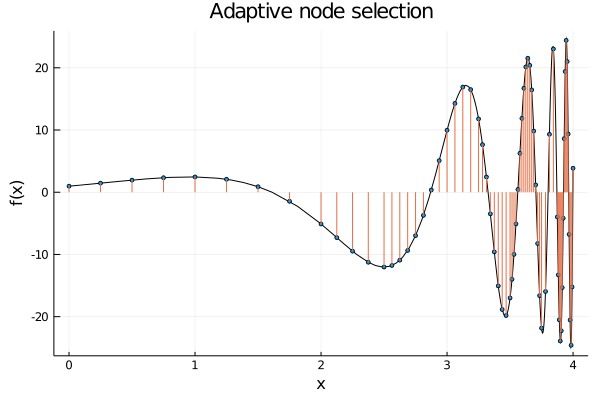

In [2]:
using FundamentalsNumericalComputation
Q,t = FNC.intadapt(f,0,4,0.001)
@show num_nodes = length(t);

using Plots
plot(f,0,4,color=:black,legend=:none,
    xlabel="x",ylabel="f(x)",title="Adaptive node selection")
plot!(t,f.(t),seriestype=:sticks,m=(:o,2))

The error turns out to be a bit more than we requested. It's only an estimate, not a guarantee.

In [3]:
@show err = I - Q;

err = I - Q = -0.022002813037627078


Let's see how the number of integrand evaluations and the error vary with the requested tolerance.

In [4]:
tol_ = @. 10.0^(-4:-1:-14)
err_ = zeros(size(tol_))
num_ = zeros(Int,size(tol_))
for i = 1:length(tol_)
    Q,t = FNC.intadapt(f,0,4,tol_[i])
    err_[i] = I - Q
    num_[i] = length(t)
end

using DataFrames
DataFrame(tol=tol_,error=err_,f_evals=num_)

,tol,error,f_evals
,Float64,Float64,Int64
1,0.0001,-0.000419469,113
2,1.0e-5,4.78977e-5,181
3,1.0e-6,6.31438e-6,297
4,1.0e-7,-6.63925e-7,489
5,1.0e-8,7.18081e-8,757
6,1.0e-9,1.26524e-8,1193
7,1.0e-10,-8.44126e-10,2009
8,1.0e-11,2.61271e-11,3157
9,1.0e-12,4.04463e-11,4797


As you can see, even though the errors are not less than the estimates, the two columns decrease in tandem. If we consider now the convergence not in $h$ (which is poorly defined) but in the number of nodes actually chosen, we come close to the fourth order accuracy of the underlying Simpson scheme.

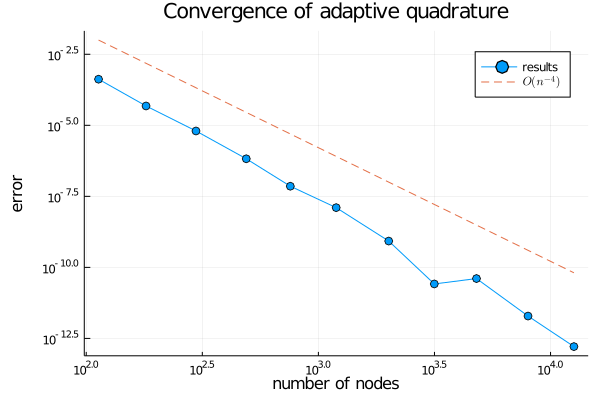

In [5]:
plot(num_,abs.(err_),m=:o,label="results",
    xaxis=(:log10,"number of nodes"),yaxis=(:log10,"error"),
    title="Convergence of adaptive quadrature")
order4 = @. 0.01*(num_/num_[1])^(-4)
plot!(num_,order4,l=:dash,label="\$O(n^{-4})\$")